## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Cotton_Disease/train'
valid_path = 'Cotton_Disease/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 137s 2us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Cotton_Disease/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Cotton_Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Cotton_Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 158s 3s/step - loss: 0.4744 - accuracy: 0.9544 - val_loss: 8.0504e-04 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 157s 3s/step - loss: 0.4947 - accuracy: 0.9575 - val_loss: 3.2632 - val_accuracy: 0.8208
Epoch 3/20
61/61 [==============================] - 154s 3s/step - loss: 0.6395 - accuracy: 0.9487 - val_loss: 0.2199 - val_accuracy: 0.9717
Epoch 4/20
61/61 [==============================] - 153s 3s/step - loss: 0.6477 - accuracy: 0.9493 - val_loss: 1.2966 - val_accuracy: 0.9340
Epoch 5/20
61/61 [==============================] - 154s 3s/step - loss: 0.5987 - accuracy: 0.9493 - val_loss: 0.3626 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 156s 3s/step - loss: 0.4013 - accuracy: 0.9657 - val_loss: 1.2418 - val_accuracy: 0.9245
Epoch 7/20
61/61 [==============================] - 156s 3s/step - loss: 0.2007 - accuracy: 0.9769 - val_loss: 0.9583 - val_accuracy: 0.9340
Epoch 8/2

In [16]:
import matplotlib.pyplot as plt

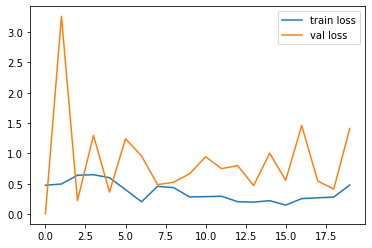

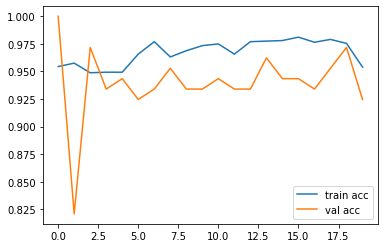

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[2.65587076e-22, 0.00000000e+00, 1.00000000e+00, 2.86292252e-35],
       [1.75431510e-26, 0.00000000e+00, 1.00000000e+00, 5.96553509e-31],
       [0.00000000e+00, 1.00000000e+00, 3.66988454e-36, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.11656972e-17, 6.87821189e-10, 4.33687184e-08],
       [1.61211452e-30, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.72914527e-36, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.20881748e-30, 0.00000000e+00, 6.88283762e-12, 1.00000000e+00],
       [1.53507841e-37, 8.52204587e-26, 1.04756067e-20, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.37696734e-26, 0.00000000e+00],
       [3.29214395e-24, 0.00000000e+00, 1.00000000e+00, 4.72357300e-32],
       [2.81125955e-18, 1.37845604e-24, 1.00000000e+00, 3.38599144e-22],
       [0.00000000e+00, 1.33196005e-15, 7.47656864e-19, 1.00000000e+00],
       [1.00000000e+00, 7.39057994e-37, 3.02058771e

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 2, 1, 0, 0, 2, 2, 3, 3, 0, 2, 2, 3, 0, 1, 3, 2, 1, 2, 2, 3, 3,
       1, 1, 0, 3, 1, 1, 3, 1, 1, 0, 0, 2, 3, 1, 2, 0, 3, 2, 3, 1, 2, 1,
       1, 2, 0, 3, 1, 2, 2, 1, 3, 3, 3, 3, 1, 0, 1, 1, 3, 1, 2, 0, 3, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 3, 0, 3, 3, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 3, 0, 0, 0, 3, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_inception.h5')

In [156]:
# img=image.load_img('./Cotton_Disease/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))
# img=image.load_img('./Cotton_Disease/test/fresh cotton leaf/d (282)_iaip.jpg',target_size=(224,224))
# img=image.load_img('./Cotton_Disease/test/diseased cotton plant/dd (731)_iaip.jpg',target_size=(224,224))
img=image.load_img('./Cotton_Disease/test/fresh cotton plant/dsd (153)_iaip.jpg',target_size=(224,224))

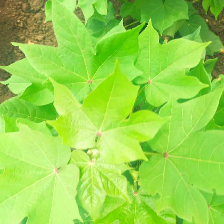

In [157]:
img

In [158]:
x=image.img_to_array(img)
x

array([[[ 98.,  82.,  46.],
        [ 99.,  83.,  47.],
        [ 99.,  83.,  47.],
        ...,
        [ 75., 143.,  32.],
        [ 78., 146.,  35.],
        [ 82., 150.,  39.]],

       [[ 99.,  83.,  47.],
        [104.,  88.,  52.],
        [108.,  92.,  56.],
        ...,
        [ 80., 148.,  35.],
        [ 83., 151.,  38.],
        [ 88., 156.,  43.]],

       [[102.,  86.,  50.],
        [101.,  85.,  49.],
        [100.,  84.,  48.],
        ...,
        [ 84., 153.,  37.],
        [ 80., 149.,  33.],
        [ 85., 154.,  38.]],

       ...,

       [[201., 254., 138.],
        [201., 254., 138.],
        [196., 249., 133.],
        ...,
        [139., 220.,  66.],
        [143., 217.,  68.],
        [143., 217.,  68.]],

       [[199., 251., 140.],
        [199., 251., 140.],
        [194., 246., 135.],
        ...,
        [140., 221.,  67.],
        [139., 219.,  68.],
        [139., 219.,  68.]],

       [[199., 251., 140.],
        [199., 251., 140.],
        [194., 2

In [159]:
x.shape

(224, 224, 3)

In [160]:
x=x/255

In [161]:
x

array([[[0.38431373, 0.32156864, 0.18039216],
        [0.3882353 , 0.3254902 , 0.18431373],
        [0.3882353 , 0.3254902 , 0.18431373],
        ...,
        [0.29411766, 0.56078434, 0.1254902 ],
        [0.30588236, 0.57254905, 0.13725491],
        [0.32156864, 0.5882353 , 0.15294118]],

       [[0.3882353 , 0.3254902 , 0.18431373],
        [0.40784314, 0.34509805, 0.20392157],
        [0.42352942, 0.36078432, 0.21960784],
        ...,
        [0.3137255 , 0.5803922 , 0.13725491],
        [0.3254902 , 0.5921569 , 0.14901961],
        [0.34509805, 0.6117647 , 0.16862746]],

       [[0.4       , 0.3372549 , 0.19607843],
        [0.39607844, 0.33333334, 0.19215687],
        [0.39215687, 0.32941177, 0.1882353 ],
        ...,
        [0.32941177, 0.6       , 0.14509805],
        [0.3137255 , 0.58431375, 0.12941177],
        [0.33333334, 0.6039216 , 0.14901961]],

       ...,

       [[0.7882353 , 0.99607843, 0.5411765 ],
        [0.7882353 , 0.99607843, 0.5411765 ],
        [0.76862746, 0

In [162]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [163]:
model.predict(img_data)

array([[2.9800227e-02, 4.1169943e-09, 9.7019976e-01, 1.3569422e-08]],
      dtype=float32)

In [164]:
a=np.argmax(model.predict(img_data), axis=1)

In [165]:
if(a==0):
    print("Diseased Cotton leaf")
elif(a==1):
    print("Diseased Cotton plant")
elif(a==2):
    print("Fresh Cotton leaf")
elif(a==3):
    print("Fresh Cotton plant")
else:
    print("Wrong Plant")   
    

Fresh Cotton leaf


In [69]:
import tensorflow as tf

In [38]:
tf.__version__

'2.7.0'